Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas.
Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

*As pessoas desse experimento só verão 1 vídeo cada

*Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal

*As amostras são aleatorias e sem viéses sistematicos

Objetivo:
Avaliar qual animal (cachorro ou gato) deve estar
em um vídeo de campanha de adoção

Experimento:
500 pessoas que não possuem animais de estimação assistem aos vídeos
de campanha de adoção. Os vídeos são idênticos com exceção dos animais
mostrados:

- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro

Resposta:
"Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
def gl_2samp_mean(n1, n2, s1=None, s2=None, equal_var=True):
    """Função para calcular o grau de liberdade da distribuição t que iremos usar no teste de hipótese.
    Leva em consideração se as variâncias populacionais são iguais ou não.
    Argumentos:
        n1 (int): tamanho da amostra 1
        n2 (int): tamanho da amostra 2
        s1 (float, opcional): desvio padrão da amostra 1
        s2 (float, opcional): desvio padrão da amostra 2
        equal_var (bool, opcional): condição para definir o método de cálculo do grau de liberdade

    Retorno:
        float: graus de liberdade da distribuição t.
    """    
    if equal_var == True:
        return n1 + n2 - 2
    else:
        A, B = s1**2/n1, s2**2/n2 #type: ignore
        gl = (A + B)**2/(A**2/(n1 - 1) + B**2/(n2 - 1))
        return gl

In [4]:
df = pd.read_csv('cachorro_gato.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   grupo       500 non-null    int64  
 2   escore      500 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


In [5]:
df.head()

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375


In [6]:
print(f'Assimetria de scores para gatos: {st.skew(df[df.grupo == 0].escore):.2f}')
print(f'Assimetria de scores para cachorros: {st.skew(df[df.grupo == 1].escore):.2f}')

Assimetria de scores para gatos: -0.11
Assimetria de scores para cachorros: -0.26


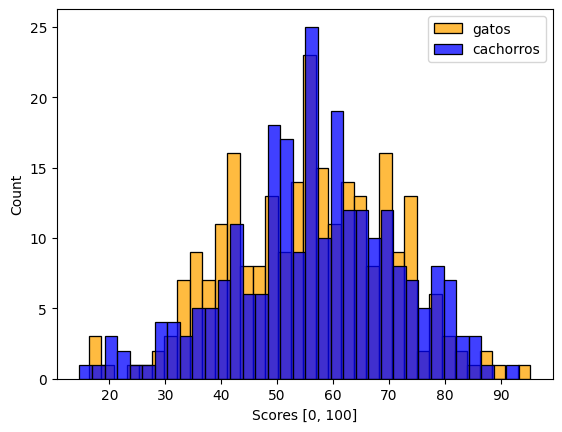

In [7]:
sns.histplot(data=df, x=df[df.grupo == 0].escore, color='orange', label='gatos', bins=35)
sns.histplot(data=df, x=df[df.grupo == 1].escore, color='blue', label='cachorros', bins=35)
plt.xlabel('Scores [0, 100]')
plt.legend()
plt.show()

In [8]:
df['pet'] = df.grupo.map({0: 'gato', 1: 'cachorro'}) # criando coluna nova chamada "pet" utilizando 

df = df.iloc[:, 1:]

df.head()

,grupo,escore,pet
0,1,59.853433,cachorro
1,0,66.353529,gato
2,1,56.495813,cachorro
3,0,67.995090,gato
4,1,70.434375,cachorro


In [9]:
df.pet.value_counts()

pet
gato        253
cachorro    247
Name: count, dtype: int64

# Teste de Hipótese

1. Não sabemos desvios padrão populacionais (score de gatos e scores de cachorros)

2. Cada amostra possui pelo menos 30 dados

Portanto, o teste a ser realizado será o t.

$H0: x̄_{gato} = x̄_{cachorro}$

$HA: x̄_{gato} \neq x̄_{cachorro}$

In [10]:
print(f'Variância para os Scores de gatos: {df[df.pet == "gato"].escore.var():.3f}')
print(f'Variância para os Score de cachorros: { df[df.pet == "cachorro"].escore.var():.3f}')

Variância para os Scores de gatos: 215.074
Variância para os Score de cachorros: 222.406


In [13]:
med_cat, std_cat = df[df.pet == 'gato'].escore.mean(), df[df.pet == 'gato'].escore.std() # média e desvio padrão para gatos

med_dog, std_dog = df[df.pet == 'cachorro'].escore.mean(), df[df.pet == 'cachorro'].escore.std() # média e desvio padrão para cachorro

S_catdog = np.sqrt(std_dog**2/247 + std_cat**2/253) # variância combinada considerando variâncias populacionais diferentes

gl = gl_2samp_mean(253, 247, std_cat, std_dog, False) # cálculo de graus de liberdade

t = (med_cat - med_dog) / S_catdog # valor para a diferença das médias de gatos e cachorros

alfa = 0.05

t_crit = st.t.ppf(alfa / 2, gl) # valor crítico de t

p_valor = 2 * st.t.sf(abs(t), gl) # p valor

print(f'Média de Scores para gatos: {med_cat:.3f}\n')
print(f'Média de Scores para cachorros: {med_dog:.3f}\n')
print(f'Valor crítico a 95% de confiança: {t_crit:.3f}\n')
print(f'Estatística de teste (t): {t:.3f}\n')
print(f'Graus de Liberdade: {gl:.3f}\n')
print(f'Nível de Significância: {alfa}')

Média de Scores para gatos: 55.532

Média de Scores para cachorros: 56.744

Valor crítico a 95% de confiança: -1.965

Estatística de teste (t): -0.916

Graus de Liberdade: 497.172

Nível de Significância: 0.05


In [14]:
print(f'RESPOSTA:\n')
if p_valor <= alfa:
    print(f'Rejeite H0, pois p = {p_valor:.3f} é menor que {alfa}.')
else:
    print(f'Não rejeite H0, pois p = {p_valor:.3f} é maior que alfa.')

RESPOSTA:

Não rejeite H0, pois p = 0.360 é maior que alfa.


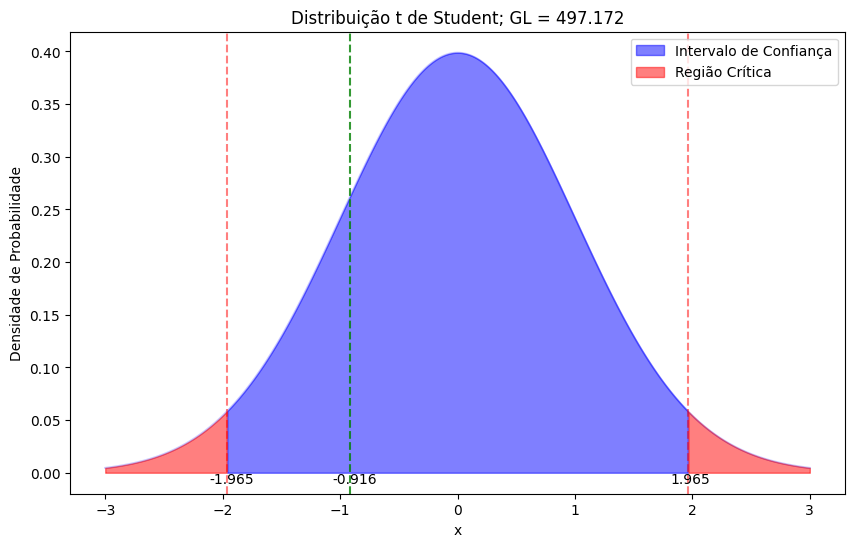

In [15]:
intervalo = np.linspace(-3, 3, 1000) # definindo o intervalo de valores para plotar o gráfico

pdf = st.t.pdf(intervalo, gl) # valores da distribuição t considerando nosso intervalo e os graus de liberdade

plt.figure(figsize=(10, 6))
plt.plot(intervalo, pdf, color='blue', alpha=0.2) # plot da linha da curva da distribuição

# preenchendo com azul a região do gráfico em que NÃO se rejeita H0
plt.fill_between(intervalo, pdf, where=(intervalo >= t_crit) & (intervalo <= abs(t_crit)), alpha=0.5, color='blue', label='Intervalo de Confiança')

# preenchendo com vermelho as regiões críticas
plt.fill_between(intervalo, pdf, where=(intervalo <= t_crit), color='red', alpha=0.5, label='Região Crítica')
plt.fill_between(intervalo, pdf, where=(intervalo >= -t_crit), color='red', alpha=0.5)

# linha vertical pontilhada marcando os valores de t crítico
plt.axvline(x=-t_crit, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=t_crit, color='red', linestyle='--', alpha=0.5)

# linha vertical verde marcando o p valor
plt.axvline(x=t, color='green', linestyle='--', alpha=0.8)

# escrevendo no gráfico os valores de t crítico
plt.annotate(f'{t_crit:.3f}',xy=(0, 0), xytext = (t_crit-0.15, -0.01), color='black')
plt.annotate(f'{abs(t_crit):.3f}',xy=(0, 0), xytext = (abs(t_crit)-0.15, -0.01), color='black')

# escrvendo o valor de 3 calculado
plt.annotate(f'{t:.3f}', (0, 0), (t - 0.15, -0.01), color='black')


plt.title(f'Distribuição t de Student; GL = {gl:.3f}') # título do gráfico
plt.xlabel('x') # nome no eixo x
plt.ylabel('Densidade de Probabilidade') # nome no eixo y
plt.legend(loc = 'upper right') # posição da legenda de cada cor
plt.show() # exibindo a imagem

In [ ]:
st.ttest_ind(df[df.grupo == 0].escore, df[df.grupo == 1].escore)

TtestResult(statistic=-0.9166663411409343, pvalue=0.35976119585131083, df=498.0)

In [ ]:
st.ttest_ind_from_stats(med_cat, std_cat, 253, med_dog, std_dog, 247, False)

Ttest_indResult(statistic=-0.9164816309140925, pvalue=0.35985866686889656)